<a href="https://colab.research.google.com/github/samyon7/Class-4-soft/blob/master/ResNet_African.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import zipfile
zip_ref = zipfile.ZipFile('dataset.zip', 'r')
zip_ref.extractall('TMP')
zip_ref.close()

In [7]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [13]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen =ImageDataGenerator(
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.02,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest', 
    validation_split=0.35
)

In [52]:
IMG_SIZE = 150

train_generator = train_datagen.flow_from_directory(
  '/content/TMP',             
  target_size=(IMG_SIZE,IMG_SIZE),  
  batch_size=32,
  class_mode='categorical', 
  subset='training'      
)
    
validation_generator = train_datagen.flow_from_directory(
  '/content/TMP',
  target_size=(IMG_SIZE,IMG_SIZE),
  batch_size=32,
  class_mode='categorical',
  subset='validation'
)

Found 1280 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [37]:
def identity_block(X, f, filters, stage, block):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters
    X_shortcut = X
    X = tf.keras.layers.Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = tf.keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = tf.keras.layers.Activation('relu')(X)
    X = tf.keras.layers.Conv2D(filters = F2, kernel_size = (f, f), strides = (1, 1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = tf.keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = tf.keras.layers.Activation('relu')(X)
    X = tf.keras.layers.Conv2D(filters = F3, kernel_size = (1, 1), strides = (1, 1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = tf.keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)
    X = tf.keras.layers.Add()([X_shortcut, X])
    X = tf.keras.layers.Activation('relu')(X)
    return X

In [18]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:434: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [23]:
tf.compat.v1.reset_default_graph()

with tf.compat.v1.Session() as test:
    np.random.seed(1)
    A_prev = tf.compat.v1.placeholder("float", [3, 4, 4, 6])
    X = np.random.randn(3, 4, 4, 6)
    A = identity_block(A_prev, f = 2, filters = [2, 4, 6], stage = 1, block = 'a')
    test.run(tf.compat.v1.global_variables_initializer())
    out = test.run([A], feed_dict={A_prev: X, K.learning_phase(): 0})
    print("out = " + str(out[0][1][1][0]))

out = [0.        0.        1.3454674 2.0318177 0.        1.3246754]


In [38]:
def identity_block(X, f, filters, stage, block):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters
    X_shortcut = X
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1, 1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1, 1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)
    X = Add()([X_shortcut, X])
    X = Activation('relu')(X)
    
    return X

In [25]:
tf.compat.v1.reset_default_graph()

with tf.compat.v1.Session() as test:
    np.random.seed(1)
    A_prev = tf.compat.v1.placeholder("float", [3, 4, 4, 6])
    X = np.random.randn(3, 4, 4, 6)
    A = identity_block(A_prev, f = 2, filters = [2, 4, 6], stage = 1, block = 'a')
    test.run(tf.compat.v1.global_variables_initializer())
    out = test.run([A], feed_dict={A_prev: X, K.learning_phase(): 0})
    print("out = " + str(out[0][1][1][0]))

out = [0.        0.        1.3454674 2.0318177 0.        1.3246754]


In [39]:
def convolutional_block(X, f, filters, stage, block, s = 2):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters
    X_shortcut = X
    
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    X = Conv2D(F2, (f, f), strides = (1, 1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)
    X = Conv2D(F3, (1, 1), strides = (1, 1), name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)
    X_shortcut = Conv2D(F3, (1, 1), strides = (s, s), name = conv_name_base + '1', kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)
    X = Add()([X_shortcut, X])
    X = Activation('relu')(X)
    
    return X

In [27]:
tf.compat.v1.reset_default_graph()

with tf.compat.v1.Session() as test:
    np.random.seed(1)
    A_prev = tf.compat.v1.placeholder("float", [3, 4, 4, 6])
    X = np.random.randn(3, 4, 4, 6)
    A = identity_block(A_prev, f = 2, filters = [2, 4, 6], stage = 1, block = 'a')
    test.run(tf.compat.v2.global_variables_initializer())
    out = test.run([A], feed_dict={A_prev: X, K.learning_phase(): 0})
    print("out = " + str(out[0][1][1][0]))

out = [0.        0.        1.3454674 2.0318177 0.        1.3246754]


In [40]:
def ResNet50(input_shape = (150, 150, 3), classes = 6):
    X_input = Input(input_shape)
    X = ZeroPadding2D((3, 3))(X_input)
    X = Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')
    X = AveragePooling2D(pool_size=(2, 2), name = 'avg_pool')(X)
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [41]:
model = ResNet50(input_shape = (150, 150, 3), classes = 4)

In [42]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95):
      print("\nAccuracy better than target training!")
      self.model.stop_training = True

callbacks = myCallback()

In [53]:
%%time
history = model.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator,
    callbacks=[callbacks]
)

Epoch 1/20
40/40 [==============================] - 31s 744ms/step - loss: 0.5987 - accuracy: 0.7539 - val_loss: 0.8673 - val_accuracy: 0.6071
Epoch 2/20
40/40 [==============================] - 30s 743ms/step - loss: 0.5871 - accuracy: 0.7531 - val_loss: 1.5185 - val_accuracy: 0.4286
Epoch 3/20
40/40 [==============================] - 30s 738ms/step - loss: 0.5969 - accuracy: 0.7711 - val_loss: 0.8017 - val_accuracy: 0.6920
Epoch 4/20
40/40 [==============================] - 30s 742ms/step - loss: 0.5309 - accuracy: 0.8055 - val_loss: 1.0387 - val_accuracy: 0.6161
Epoch 5/20
40/40 [==============================] - 30s 743ms/step - loss: 0.5410 - accuracy: 0.8031 - val_loss: 1.0661 - val_accuracy: 0.6161
Epoch 6/20
40/40 [==============================] - 30s 750ms/step - loss: 0.5355 - accuracy: 0.7945 - val_loss: 1.2002 - val_accuracy: 0.5848
Epoch 7/20
40/40 [==============================] - 30s 751ms/step - loss: 0.4892 - accuracy: 0.8242 - val_loss: 1.0075 - val_accuracy: 0.5848

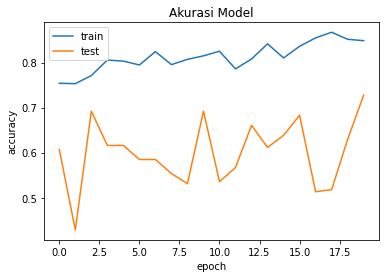

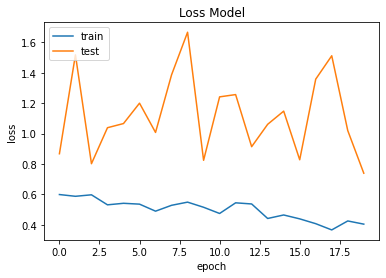

In [54]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [55]:
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)

validation_generator = train_datagen.flow_from_directory(
  '/content/TMP',
  target_size=(IMG_SIZE,IMG_SIZE),
  batch_size=31,
  class_mode='categorical',
)

from sklearn.metrics import classification_report, confusion_matrix

validation_generator.reset()
Y_predi = model.predict_generator(validation_generator, 1504 //31-1)
y_predi = np.argmax(Y_predi, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_predi))
print('Classification Report')
print(classification_report(validation_generator.classes, y_predi, target_names=target_names))

Found 1504 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[356  12   8   0]
 [ 90 226  58   2]
 [ 54  50 271   1]
 [ 10  30   3 333]]
Classification Report
              precision    recall  f1-score   support

     buffalo       0.70      0.95      0.80       376
    elephant       0.71      0.60      0.65       376
       rhino       0.80      0.72      0.76       376
       zebra       0.99      0.89      0.94       376

    accuracy                           0.79      1504
   macro avg       0.80      0.79      0.79      1504
weighted avg       0.80      0.79      0.79      1504



In [56]:
model.save("Resnet_African.h5")